<a href="https://colab.research.google.com/github/yuxuan0702/DS_TakeHome_Case-/blob/master/retention_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import packages 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost
from sklearn.metrics import accuracy_score,roc_auc_score

%matplotlib inline
plt.style.use('fivethirtyeight')

In [ ]:
# import dataset 
df = pd.read_csv('/content/drive/My Drive/Collection of DS take home challenges/data collection-Product dataset数据挑战数据集/INSIGHTS Employee Retention with solution/employee_retention.csv')
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [ ]:
# dataset information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   employee_id  24702 non-null  float64
 1   company_id   24702 non-null  int64  
 2   dept         24702 non-null  object 
 3   seniority    24702 non-null  int64  
 4   salary       24702 non-null  float64
 5   join_date    24702 non-null  object 
 6   quit_date    13510 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 1.3+ MB


In [ ]:
# seniority describe
df['seniority'].describe()

count    24702.000000
mean        14.127803
std          8.089520
min          1.000000
25%          7.000000
50%         14.000000
75%         21.000000
max         99.000000
Name: seniority, dtype: float64

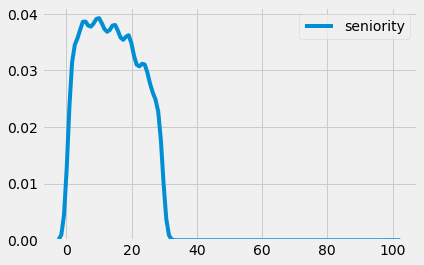

In [ ]:
sns.kdeplot(df['seniority'])

In [ ]:
# clean data 
# seniority should less than 45
df = df[df.seniority<45]

In [ ]:
# seniority describe
df['seniority'].describe()

count    24700.000000
mean        14.120972
std          8.054137
min          1.000000
25%          7.000000
50%         14.000000
75%         21.000000
max         29.000000
Name: seniority, dtype: float64

In [ ]:
# create new columns called quit or not 
index = list(df[df.quit_date.isnull()].index)
df['quit_or_not'] = 0
df.loc[index,'quit_or_not'] = 1

In [ ]:
df

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,quit_or_not
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,0
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN,1
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,0
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,0
...,...,...,...,...,...,...,...,...
24695,63273.0,1,data_science,5,172000.0,2012-05-01,2015-06-26,0
24696,94644.0,6,marketing,7,88000.0,2012-01-26,2013-02-01,0
24697,549847.0,3,customer_service,16,97000.0,2015-02-18,NaN,1
24698,590087.0,4,engineer,10,160000.0,2015-10-26,NaN,1


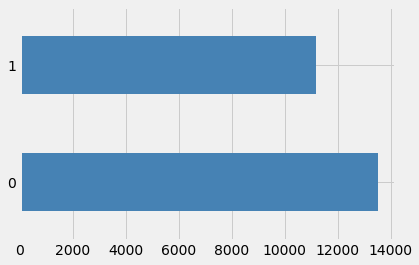

In [ ]:
# create target variables 
df.quit_or_not.value_counts().plot(kind = 'barh',color = 'steelblue')

In [ ]:
# change the datatype 
df['join_date'] = pd.to_datetime(df['join_date'])
df['quit_date'] = pd.to_datetime(df['quit_date'])

In [ ]:
df['company_id'] = df['company_id'].astype('category')

# Data Visualization

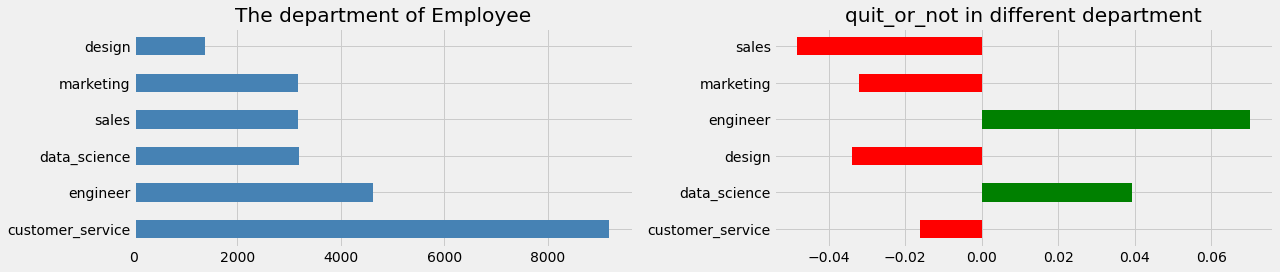

In [ ]:
# department
plt.figure(figsize = (18,4))
plt.subplot(1,2,1)
df.dept.value_counts().plot(kind = 'barh',color = 'steelblue')
plt.title('The department of Employee')

plt.subplot(1,2,2)
quit_or_not = (df.groupby('dept')[['quit_or_not']].mean() - df.quit_or_not.mean())/df.quit_or_not.std()
quit_or_not['colors'] = ['red' if x < 0 else 'green' for x in quit_or_not['quit_or_not']]
quit_or_not.quit_or_not.plot(kind = 'barh',color = quit_or_not.colors)

plt.title('quit_or_not in different department')
plt.ylabel('')
plt.tight_layout()
plt.show()

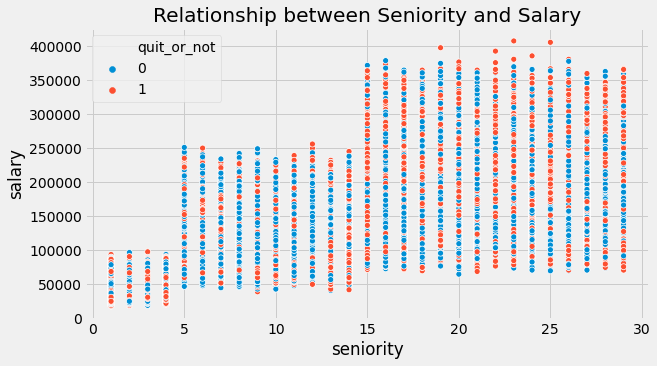

In [ ]:
# Scatter Plot to see Seniority and Salary in Department
plt.figure(figsize = (9,5))
sns.scatterplot(df.seniority,df.salary,hue = df.quit_or_not)
plt.legend()
plt.title('Relationship between Seniority and Salary')
plt.show()

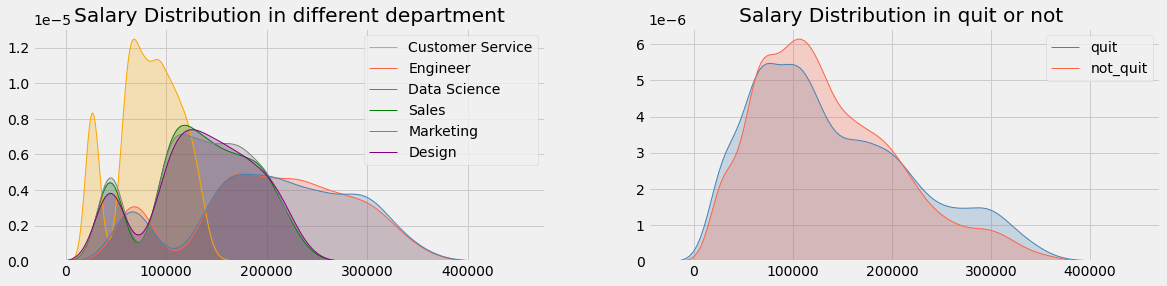

In [ ]:
# Salary Distribution in Department
plt.figure(figsize = (18,4))
plt.subplot(1,2,1)
sns.kdeplot(df[df.dept == 'customer_service']['salary'],color = 'orange',shade = True,linewidth = 1,label = 'Customer Service')
sns.kdeplot(df[df.dept == 'engineer']['salary'],color = 'tomato',shade = True,linewidth = 1,label = 'Engineer')
sns.kdeplot(df[df.dept == 'data_science']['salary'],color = 'steelblue',shade = True,linewidth = 1,label = 'Data Science')
sns.kdeplot(df[df.dept == 'sales']['salary'],color = 'green',shade = True,linewidth = 1,label = 'Sales')
sns.kdeplot(df[df.dept == 'marketing']['salary'],color = 'grey',shade = True,linewidth = 1,label = 'Marketing')
sns.kdeplot(df[df.dept == 'design']['salary'],color = 'Purple',shade = True,linewidth = 1,label = 'Design')
plt.title('Salary Distribution in different department')

# Salary Distribution in Department
plt.subplot(1,2,2)
sns.kdeplot(df[df.quit_or_not == 1]['salary'],color = 'steelblue',shade = True,linewidth = 1,label = 'quit')
sns.kdeplot(df[df.quit_or_not == 0]['salary'],color = 'tomato',shade = True,linewidth = 1,label = 'not_quit')
plt.legend()
plt.title('Salary Distribution in quit or not ')

plt.show()

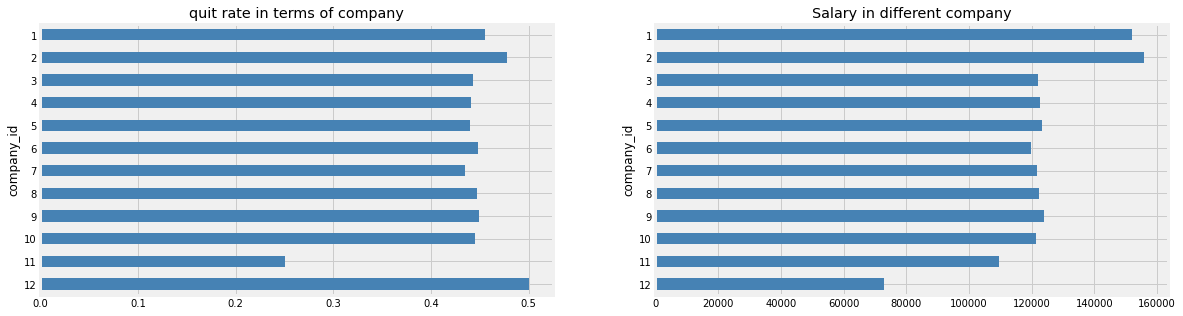

In [ ]:
# retention rate and salary in different company 
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)

df.groupby('company_id')['quit_or_not'].mean().sort_index(ascending = False).plot(kind = 'barh',color = 'steelblue')
plt.title('quit rate in terms of company')

plt.subplot(1,2,2)
df.groupby('company_id')['salary'].mean().sort_index(ascending = False).plot(kind = 'barh',color = 'steelblue')
plt.title('Salary in different company')

plt.show()

In [ ]:
df[df.company_id == 12]['dept'].value_counts()

customer_service    12
data_science         4
engineer             4
sales                2
marketing            1
design               1
Name: dept, dtype: int64

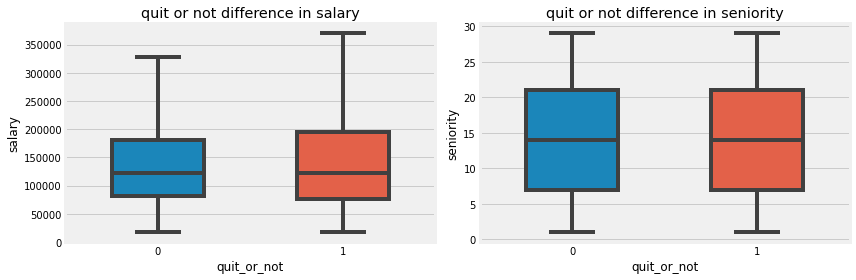

In [ ]:
# quit or not in terms of salary 
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(data = df,x = 'quit_or_not',y = 'salary',showfliers = False,width = 0.5)
plt.title('quit or not difference in salary')

plt.subplot(1,2,2)
sns.boxplot(data = df,x = 'quit_or_not',y = 'seniority',showfliers = False,width = 0.5)
plt.title('quit or not difference in seniority')
plt.tight_layout()
plt.show()


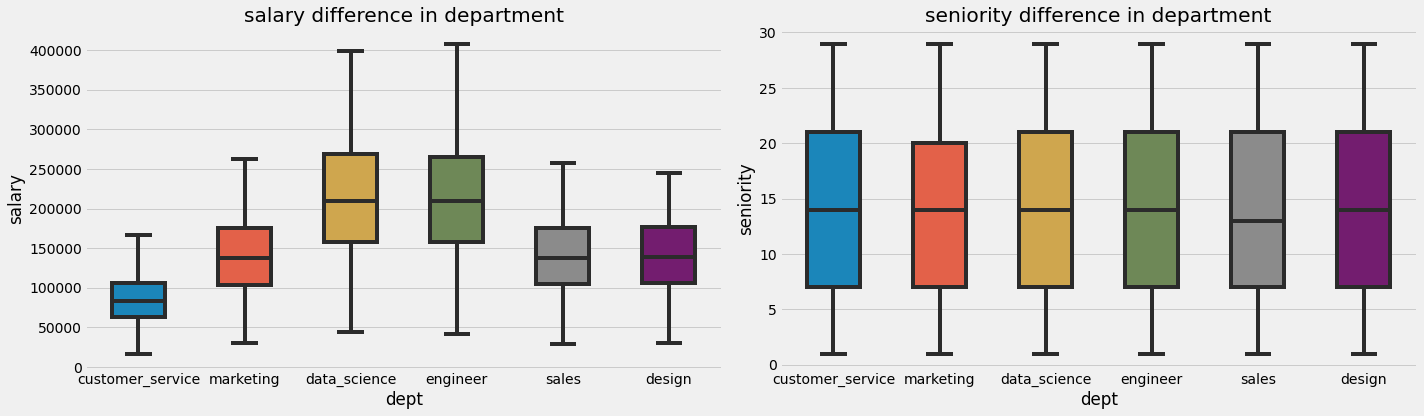

In [ ]:
# quit or not in terms of salary 
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.boxplot(data = df,x = 'dept',y = 'salary',width = 0.5)
plt.title('salary difference in department')

plt.subplot(1,2,2)
sns.boxplot(data = df,x = 'dept',y = 'seniority',width = 0.5)
plt.title('seniority difference in department')
plt.tight_layout()
plt.show()

In [ ]:
df.groupby('quit_or_not')['salary'].mean()

quit_or_not
0    135639.102754
1    141238.473910
Name: salary, dtype: float64

In [ ]:
df.groupby('quit_or_not')['seniority'].mean()

quit_or_not
0    14.118967
1    14.123392
Name: seniority, dtype: float64

# Model Fiting

In [ ]:
df = pd.get_dummies(df)
df.drop(columns = ['employee_id','join_date','quit_date'],inplace = True)
df.head()

,seniority,salary,quit_or_not,company_id_1,company_id_2,company_id_3,company_id_4,company_id_5,company_id_6,company_id_7,company_id_8,company_id_9,company_id_10,company_id_11,company_id_12,dept_customer_service,dept_data_science,dept_design,dept_engineer,dept_marketing,dept_sales
0,28,89000.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,20,183000.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,14,101000.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,20,115000.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,23,276000.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
x = df.drop(columns = ['quit_or_not'])
y = df['quit_or_not']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

In [ ]:
rf = RandomForestClassifier(min_samples_leaf=30)

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf.score(x_train,y_train)

0.5905147484094853

In [ ]:
rf.score(x_test,y_test)

0.5569500674763833

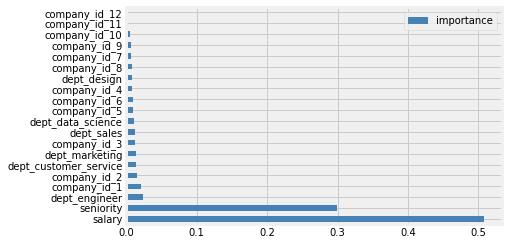

In [ ]:
pd.DataFrame(rf.feature_importances_,index = x.columns,columns = ['importance']).sort_values('importance',ascending = False).plot(kind = 'barh',color = 'steelblue')

In [ ]:
ada = AdaBoostClassifier()

In [ ]:
ada.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [ ]:
ada.score(x_test,y_test)

0.5623481781376518

In [ ]:
ada.feature_importances_

array([0.1 , 0.78, 0.02, 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.02, 0.  , 0.  , 0.  , 0.02, 0.02, 0.  , 0.02])

In [ ]:
pd.DataFrame(ada.feature_importances_,index = x.columns,columns = ['importance']).sort_values('importance',ascending = False)

,importance
salary,0.78
seniority,0.10
dept_engineer,0.02
dept_design,0.02
company_id_11,0.02
dept_sales,0.02
company_id_2,0.02
company_id_1,0.02
company_id_5,0.00
company_id_6,0.00


In [ ]:
pip install eli5

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
perm = PermutationImportance(rf, random_state=1).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

Weight,Feature
0.0174 ± 0.0092,salary
0.0017 ± 0.0006,company_id_4
0.0011 ± 0.0013,dept_design
0.0004 ± 0.0022,dept_data_science
0.0004 ± 0.0010,company_id_7
0.0002 ± 0.0007,company_id_10
0 ± 0.0000,company_id_12
0 ± 0.0000,company_id_11
-0.0002 ± 0.0048,dept_customer_service
-0.0004 ± 0.0012,company_id_9
